# 1:Importing libraries

In [24]:
import matplotlib.pyplot as plt 
import seaborn as sns 
color = sns.color_palette()
import numpy as np 
import pandas as pd

# 2: Reading Data

In [25]:
data = pd.read_csv("data.csv")
data.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [26]:
data.tail()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
1594,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1595,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1596,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1597,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...
1598,6;0.31;0.47;3.6;0.067;18;42;0.99549;3.39;0.66;...


In [27]:
data.shape

(1599, 1)

In [28]:
data.sample()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
314,7.4;0.36;0.29;2.6;0.087;26;72;0.99645;3.39;0.6...


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


In [30]:
data.describe()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
count,1599
unique,1359
top,7.5;0.51;0.02;1.7;0.084;13;31;0.99538;3.36;0.5...
freq,4


# 3: Data Cleaning

In [31]:
import pandas as pd
data = pd.read_csv("data.csv")


In [32]:
data.isnull().sum()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    0
dtype: int64

In [33]:
import pandas as pd
import numpy as np
numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])
numeric_cols.fillna(numeric_cols.mean(), inplace=True)   
data = pd.concat([numeric_cols, non_numeric_cols], axis=1)
missing_values = data.isnull().sum()
print(missing_values)

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    0
dtype: int64


In [34]:
import pandas as pd
import numpy as np
numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])
numeric_cols.fillna(numeric_cols.mean(), inplace=True) 
for col in non_numeric_cols.columns:
    non_numeric_cols[col].fillna(non_numeric_cols[col].mode()[0], inplace=True) 
data = pd.concat([numeric_cols, non_numeric_cols], axis=1)
missing_values = data.isnull().sum()
print(missing_values)

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    0
dtype: int64


/tmp/ipykernel_4865/3755400923.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  non_numeric_cols[col].fillna(non_numeric_cols[col].mode()[0], inplace=True)


In [35]:
data.shape

(1599, 1)

# 4:Handling Missing Data

Removal: Deleting rows with missing values.
-

In [36]:
data = pd.read_csv("data.csv")
data.isnull().sum()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    0
dtype: int64

In [37]:
data.shape

(1599, 1)

In [38]:
data.dropna(inplace=True)
missing_values = data.isnull().sum()
print(missing_values)

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    0
dtype: int64


In [39]:
data.shape

(1599, 1)

Removing Duplicates
-

In [40]:
data = pd.read_csv("data.csv")
data.shape

(1599, 1)

In [41]:
data.drop_duplicates(inplace=True)
data.shape

(1359, 1)

# 5: Outlier Detection and Removal

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("data.csv")
data.describe()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
count,1599
unique,1359
top,7.5;0.51;0.02;1.7;0.084;13;31;0.99538;3.36;0.5...
freq,4


In [43]:
0.25-1.5*0.5


-0.5

In [44]:
0.75 + 1.5 * 0.5

1.5

ValueError: boxplot method requires numerical columns, nothing to plot.

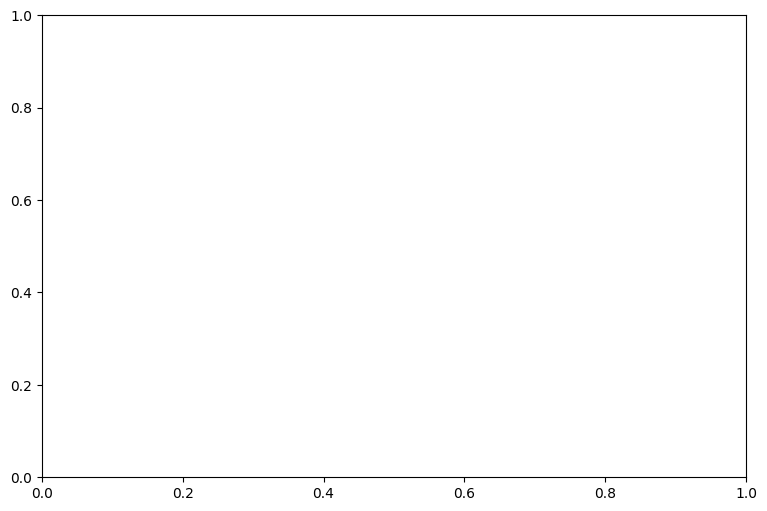

In [45]:
numeric_cols = data.select_dtypes(include=[np.number])
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
data_cleaned = data[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
numeric_cols.boxplot()
plt.title("Before Outlier Removal")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
data_cleaned.select_dtypes(include=[np.number]).boxplot()
plt.title("After Outlier Removal")
plt.tight_layout()
plt.show()

In [ ]:
data_cleaned.shape

In [ ]:
data_cleaned.head()

# 6. Encode categorical variables

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("data.csv")
data.head(2)

In [ ]:
data["Global_active_power"].unique()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("data.csv")

cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']

data1 = pd.get_dummies(cat_features)
data1

# 7: Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
data = pd.read_csv("data.csv")

X = data.drop('Global_active_power', axis=1)
y = data['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 8. Data Transformation


Normalization
-

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("C:/Users/Ayaan/Desktop/household_power_consumption.csv")

numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)

scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)

scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()


Standardization
-

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("C:/Users/Ayaan/Desktop/household_power_consumption.csv")

numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)

scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)

scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()

# regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = pd.read_csv("C:/Users/Ayaan/Desktop/household_power_consumption.csv")

data = data.dropna()

In [ ]:
X = data[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = data['Global_active_power']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

# Simple Linear Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("C:/Users/Ayaan/Desktop/household_power_consumption.csv")

X = data[['Voltage']]
y = data['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Simple Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Voltage')
plt.ylabel('Global Active Power')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()